# Decision Trees

## Setup

In [2]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("Decision-Trees"):
    raise ValueError("Please change working directory to 'path/Decision-Trees' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/Decision-Trees


In [114]:
!pip install -r requirements.txt

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [116]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [117]:
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [118]:
iris_data = iris.data
X = iris_data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

## Training and Visualizing

In [119]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

## Graphviz

In [120]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf, 
    out_file="visualization/iris_tree.dot", 
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

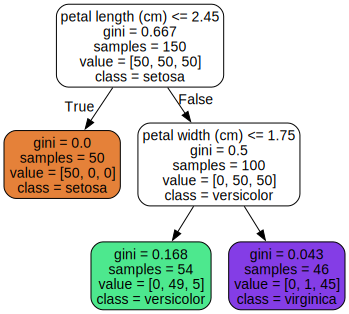

In [121]:
from graphviz import Source

Source.from_file("visualization/iris_tree.dot")

In [122]:
!dot -Tpng visualization/iris_tree.dot -o visualization/iris_tree.png

## Predictions

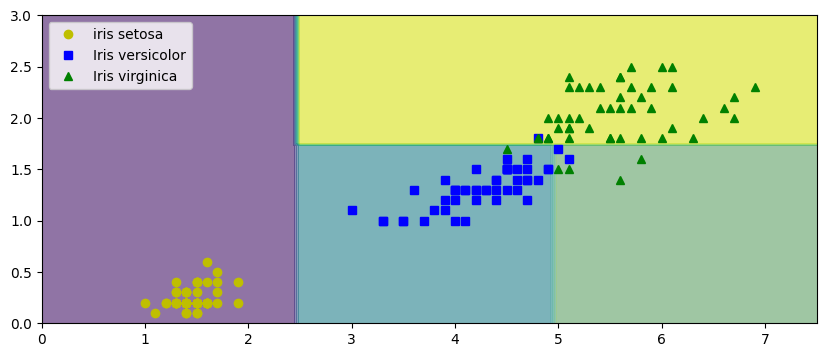

In [123]:
plt.figure(figsize=(10, 4))

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="iris setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")

tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X, y)

lengths = np.linspace(0, 7.5, 100)
widths = np.linspace(0, 3.0, 100)

length_mesh, width_mesh = np.meshgrid(lengths, widths)
X_mesh = np.c_[length_mesh.ravel(), width_mesh.ravel()]
y_pred = tree_clf.predict(X_mesh).reshape(length_mesh.shape)
y_deep_pred = tree_clf_deeper.predict(X_mesh).reshape(length_mesh.shape)

plt.contourf(length_mesh, width_mesh, y_pred, alpha=.5)
plt.contourf(length_mesh, width_mesh, y_deep_pred, alpha=.2)
plt.legend()
plt.show()

## Decision Tree Proba

In [124]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [125]:
help(tree_clf.tree_)

Help on Tree object:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |      For leaves, childre

## Load moons

In [126]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

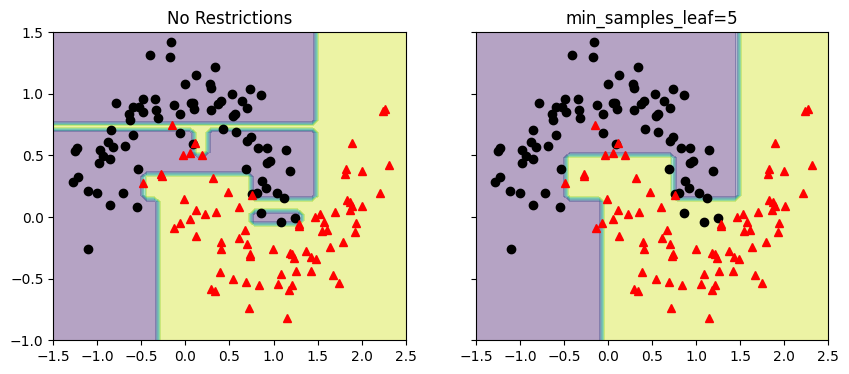

In [127]:
x1s = np.linspace(-1.5, 2.5)
x2s = np.linspace(-1, 1.5)
x1_mesh, x2_mesh = np.meshgrid(x1s, x2s)

X_mesh = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
y_pred1 = tree_clf1.predict(X_mesh).reshape(x1_mesh.shape)
y_pred2 = tree_clf2.predict(X_mesh).reshape(x1_mesh.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4), sharey=True)
ax1.contourf(x1_mesh, x2_mesh, y_pred1, cmap="viridis", alpha=0.4)
ax2.contourf(x1_mesh, x2_mesh, y_pred2, cmap="viridis", alpha=0.4)

for ax in (ax1, ax2):
    ax.plot(X_moons[:, 0][y_moons==0], X_moons[:, 1][y_moons==0], "ko")
    ax.plot(X_moons[:, 0][y_moons==1], X_moons[:, 1][y_moons==1], "r^")

ax1.set_title("No Restrictions")
ax2.set_title("min_samples_leaf=5")
plt.show()

## Regression

### Generate Quadratic Data

In [128]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)

X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)


### Train Decision Tree Regressor

In [129]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [130]:
export_graphviz(
    tree_reg,
    "visualization/regression_tree.dot",
    feature_names=["x1"],
    rounded=True,
    filled=True
)

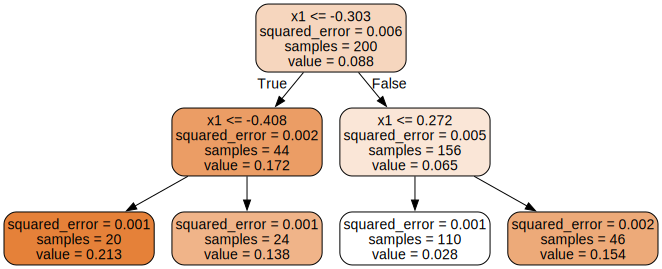

In [131]:
Source.from_file("visualization/regression_tree.dot")

In [132]:
tree_reg_deeper = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg_deeper.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [133]:
def plot_regression_predictions(tree_reg, axes=[-0.5, 0.5, -0.05, 0.25]):
    xs = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(xs)
    plt.axis(axes)
    plt.plot(xs, y_pred, "r")

def plot_thresholds(tree_reg):
    tree = tree_reg.tree_
    node_depths = tree.compute_node_depths()
    for node_id in range(tree.node_count):
        if (tree.children_left[node_id] != tree.children_right[node_id]):
            for depth, style in [(1, "solid"), (2, "dashed"), (3, "dotted")]:
                if (node_depths[node_id] == depth):
                    plt.vlines(tree.threshold[node_id], -0.05, 0.25, "k", style)

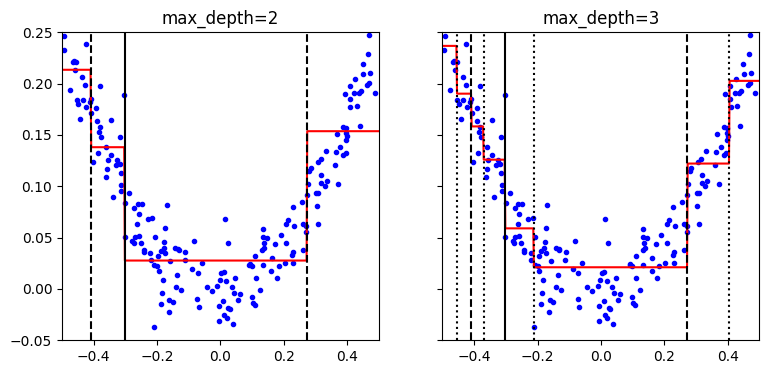

In [134]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(9, 4))

tree_regs = [tree_reg, tree_reg_deeper]
for i in range(2):
    plt.sca(axs[i])
    plt.title(f"max_depth={i+2}")
    plt.plot(X_quad, y_quad, "b.")
    plot_regression_predictions(tree_regs[i])
    plot_thresholds(tree_regs[i])

plt.show()

### Regularization

In [135]:
tree_reg_no_restrictions = DecisionTreeRegressor(random_state=42)
tree_reg_restricted = DecisionTreeRegressor(min_samples_leaf=10, random_state=42)

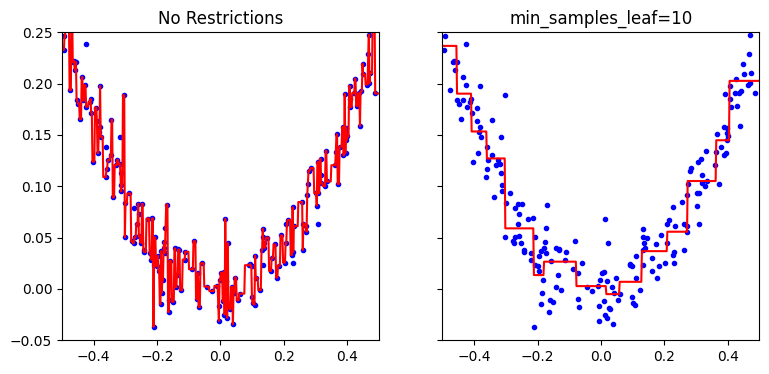

In [136]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(9, 4))
for ax, dt_reg in zip(axs, [tree_reg_no_restrictions, tree_reg_restricted]):
    dt_reg.fit(X_quad, y_quad)
    plt.sca(ax)
    plt.plot(X_quad, y_quad, "b.")
    plot_regression_predictions(dt_reg)

axs[0].set_title("No Restrictions")
axs[1].set_title("min_samples_leaf=10")
plt.show()


## Axis Orientation

In [137]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

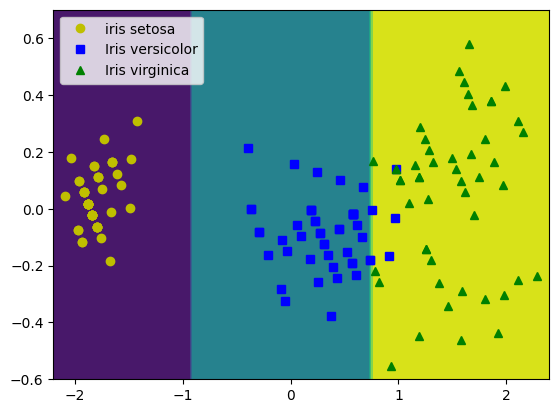

In [143]:
plt.plot(X_iris_rotated[:, 0][y==0], X_iris_rotated[:, 1][y==0], "yo", label="iris setosa")
plt.plot(X_iris_rotated[:, 0][y==1], X_iris_rotated[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X_iris_rotated[:, 0][y==2], X_iris_rotated[:, 1][y==2], "g^", label="Iris virginica")

axes = [-2.2, 2.4, -0.6, 0.7]
z0s, z1s = np.meshgrid(np.linspace(axes[0], axes[1], 100), np.linspace(axes[2], axes[3], 100))
X_coords = np.c_[z0s.ravel(), z1s.ravel()]
y_pred = tree_clf_pca.predict(X_coords).reshape(z0s.shape)
plt.contourf(z0s, z1s, y_pred)
 
plt.legend()
plt.show()